# Image Processing

<h2>Table of Content</h2>
<ul>
  <li>Get Image from url on internet</li>
  <li>Convert Image into Matrix 2D</li>
  <li>RGB matrix (3 Channel) to Greyscale matrix (1 Channel)</li>
  <li>Display Image from Image Array</li>
  <li>Histogram Colors</li>
  <li>HSV, HSL, YUV, YCbCr</li>
  <li>Edge Detection</li>
  <li>Pixel Arithmetic Operation</li>
  <li>Fourier Transform</li>
  <li>Opacity Image</li>
</ul>




## Get Image from url on internet

In [1]:
import urllib.request
def getImageFromUrl(linkImg, nameImg):
  img_url = linkImg
  pathImg, _ = urllib.request.urlretrieve(img_url, f'{nameImg}.jpg')

  return pathImg

In [2]:
from PIL import Image
import numpy as np

pathImg = getImageFromUrl("https://ichef.bbci.co.uk/news/976/cpsprodpb/67CF/production/_108857562_mediaitem108857561.jpg", "sample")

get_img = Image.open(pathImg)

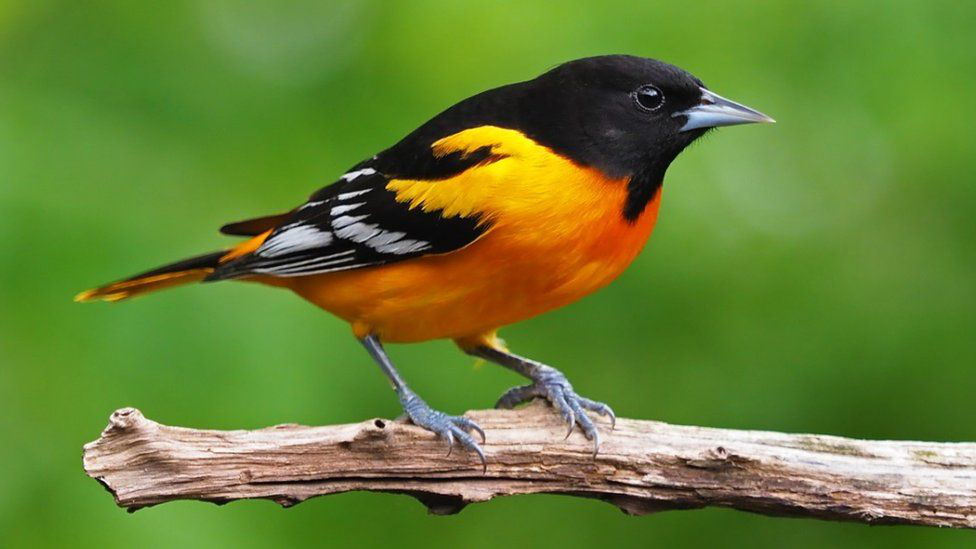

In [3]:
get_img

## Convert Image into Matrix 2D

In [4]:
pathImg

'sample.jpg'

In [5]:
from PIL import Image
import numpy as np

def matrix2DImage(imgPath, resize=None):
  
  path = imgPath

  get_img = Image.open(path)

  if resize != None:
    get_img = get_img.resize(resize)
  
  img_array = np.asarray(get_img, dtype='int32')
  
  # convert image array from 3D to 2D
  rows, columns, _ = img_array.shape
  imgArray2D = []
  for row in range(rows):
    imgArray2D.append([])
    for column in range(columns):
      imgArray2D[row].append(img_array[row][column])

  return imgArray2D

In [6]:
import pandas as pd

img1_Array2D = matrix2DImage(pathImg)
df_img1 = pd.DataFrame(img1_Array2D)

In [7]:
rows, columns = df_img1.shape
print(f"rows: {rows}\ncolumns: {columns}")
df_img1.head()

rows: 549
columns: 976


0               1    ...            974            975
0  [113, 155, 27]  [113, 155, 29]  ...  [93, 148, 57]  [93, 148, 57]
1  [113, 155, 27]  [113, 155, 29]  ...  [93, 148, 57]  [93, 148, 57]
2  [113, 155, 29]  [113, 155, 29]  ...  [93, 148, 57]  [93, 148, 57]
3  [114, 156, 30]  [113, 155, 29]  ...  [93, 148, 57]  [93, 148, 57]
4  [114, 156, 30]  [113, 155, 29]  ...  [93, 148, 57]  [92, 147, 56]

[5 rows x 976 columns]

In [8]:
df_img1.shape

(549, 976)

## RGB matrix (3 Channel) to Greyscale matrix (1 Channel)

In [9]:
import copy
import numpy as np

def matrixRGBToGrey(dfRGB):

  rows, columns = dfRGB.shape

  npRGB = np.array(copy.deepcopy(dfRGB))

  grey = []
  for row in range(rows):
    grey.append([])
    for column in range(columns):
      r, g, b = npRGB[row][column]
      
      greyR = 0.2989 * r
      greyG = 0.5870 * g
      greyB = 0.1140 * b

      greyRGB = int(greyR + greyG + greyB)
      grey[row].append(greyRGB)


  return np.array(grey)

In [10]:
npImg1Grey = matrixRGBToGrey(df_img1)
npImg1Grey.shape

(549, 976)

In [11]:
import pandas as pd

df_img1_grey = pd.DataFrame(npImg1Grey)
df_img1_grey.head()

0    1    2    3    4    5    6    ...  969  970  971  972  973  974  975
0  127  128  128  128  128  128  127  ...  121  121  120  120  120  121  121
1  127  128  128  128  128  128  127  ...  121  121  121  120  120  121  121
2  128  128  128  128  128  126  126  ...  121  121  121  121  120  121  121
3  129  128  128  128  127  126  125  ...  121  121  121  121  120  121  121
4  129  128  128  127  127  125  126  ...  121  121  120  120  120  121  120

[5 rows x 976 columns]

In [12]:
type(df_img1_grey)

pandas.core.frame.DataFrame

In [13]:
type(npImg1Grey)

numpy.ndarray

## Display Image from Image Array

In [14]:
import numpy as np
from PIL import Image

def displayImage(imgArray):

  # if not numpy array
  if type(imgArray) != np.ndarray:
    imgArray = np.array(imgArray)

  return Image.fromarray((imgArray).astype(np.uint8))


### Grey Image

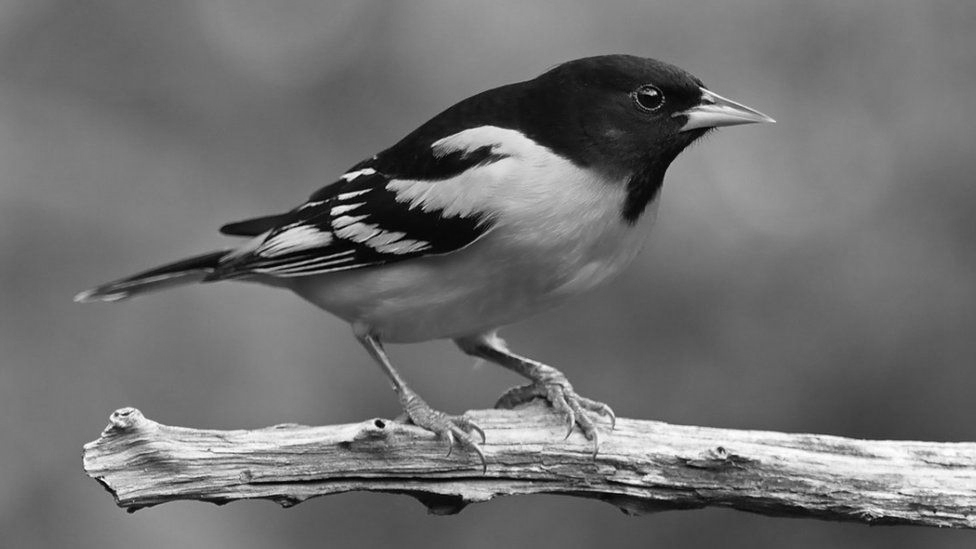

In [15]:
displayImage(npImg1Grey)

### Original Image

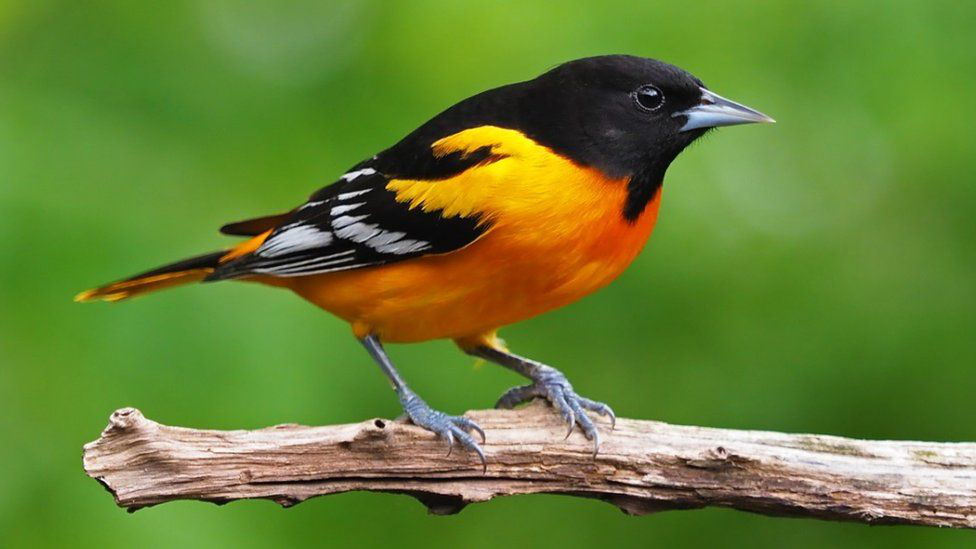

In [16]:
displayImage(img1_Array2D)

## Histogram Colors

In [17]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [18]:
npImg1Grey[0][0]

127

In [19]:
img1_Array2D[0][0]

array([113, 155,  27], dtype=int32)

In [20]:
import pandas as pd

def combineRGBG(imgRGB, imgGrey):

  tempRed = []
  tempGreen = []
  tempBlue = []
  tempGrey = []

  rows, columns = imgGrey.shape

  for row in range(rows):
    for column in range(columns):
      red, green, blue = imgRGB[row][column]
      grey = imgGrey[row][column]

      tempRed.append(int(red))
      tempGreen.append(int(green))
      tempBlue.append(int(blue))
      tempGrey.append(int(grey))
      
  dfColors = pd.DataFrame({
      "Red" : tempRed,
      "Green": tempGreen,
      "Blue": tempBlue,
      "Grey": tempGrey
  })

  return dfColors
  

In [21]:
dfColors = combineRGBG(img1_Array2D, npImg1Grey)

In [22]:
print(dfColors["Red"][0])
print(dfColors["Green"][0])
print(dfColors["Blue"][0])
print(dfColors["Grey"][0])

113
155
27
127


In [23]:
def countColors(dfColors):

  temp_color = [0 for i in range(256)]

  dfCountColors = pd.DataFrame(
      {"Red": temp_color,
      "Green": temp_color,
      "Blue": temp_color,
      "Grey": temp_color
      }
  )

  rowsCountColors, columnsCountColors = dfCountColors.shape

  for row_colors in range(rowsCountColors):
      for column_colors in range(columnsCountColors):
          color_name = dfColors.columns[column_colors]
          n_colors = dfColors[color_name][dfColors[color_name]== row_colors].count()
          dfCountColors[color_name][row_colors] = n_colors

  return dfCountColors

In [24]:
dfCountColors = countColors(dfColors)

In [25]:
dfCountColors.shape

(256, 4)

In [26]:
dfCountColors

Red  Green   Blue  Grey
0      60    151  17100    33
1      32     65   4649    41
2      29     91   4482    57
3      61     95   3702    56
4      67    111   3306    93
..    ...    ...    ...   ...
251   617     94     61    67
252   608     69     40    59
253   575     64     35    46
254   487     30     12    28
255  1507     37     48     0

[256 rows x 4 columns]

### Table Colors

In [27]:
from tabulate import tabulate
dfCountColors.columns


Index(['Red', 'Green', 'Blue', 'Grey'], dtype='object')

In [28]:
print(tabulate(dfCountColors, headers=dfCountColors.columns, tablefmt='fancy_grid'))

╒═════╤═══════╤═════════╤════════╤════════╕
│     │   Red │   Green │   Blue │   Grey │
╞═════╪═══════╪═════════╪════════╪════════╡
│   0 │    60 │     151 │  17100 │     33 │
├─────┼───────┼─────────┼────────┼────────┤
│   1 │    32 │      65 │   4649 │     41 │
├─────┼───────┼─────────┼────────┼────────┤
│   2 │    29 │      91 │   4482 │     57 │
├─────┼───────┼─────────┼────────┼────────┤
│   3 │    61 │      95 │   3702 │     56 │
├─────┼───────┼─────────┼────────┼────────┤
│   4 │    67 │     111 │   3306 │     93 │
├─────┼───────┼─────────┼────────┼────────┤
│   5 │   111 │     167 │   2782 │    125 │
├─────┼───────┼─────────┼────────┼────────┤
│   6 │   138 │     188 │   2423 │    194 │
├─────┼───────┼─────────┼────────┼────────┤
│   7 │   195 │     284 │   2367 │    268 │
├─────┼───────┼─────────┼────────┼────────┤
│   8 │   246 │     351 │   2303 │    343 │
├─────┼───────┼─────────┼────────┼────────┤
│   9 │   335 │     531 │   2303 │    584 │
├─────┼───────┼─────────┼───────

### Normal Histogram

In [29]:
dfCountColors.columns

Index(['Red', 'Green', 'Blue', 'Grey'], dtype='object')

In [30]:
dfCountColors.index

RangeIndex(start=0, stop=256, step=1)

In [31]:
import matplotlib.pyplot as plt

def displayHistogram(df):
  rows, columns = 2, 2

  fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))

  i = 0
  for row in range(rows):
    for column in range(columns):
      colorName = df.columns[i]
      x_axis = df.index
      y_axis = df[colorName]
      axes[row][column].hist(x_axis, weights=y_axis, color=colorName)
      axes[row][column].set_title(colorName)
      i +=1

  plt.show()


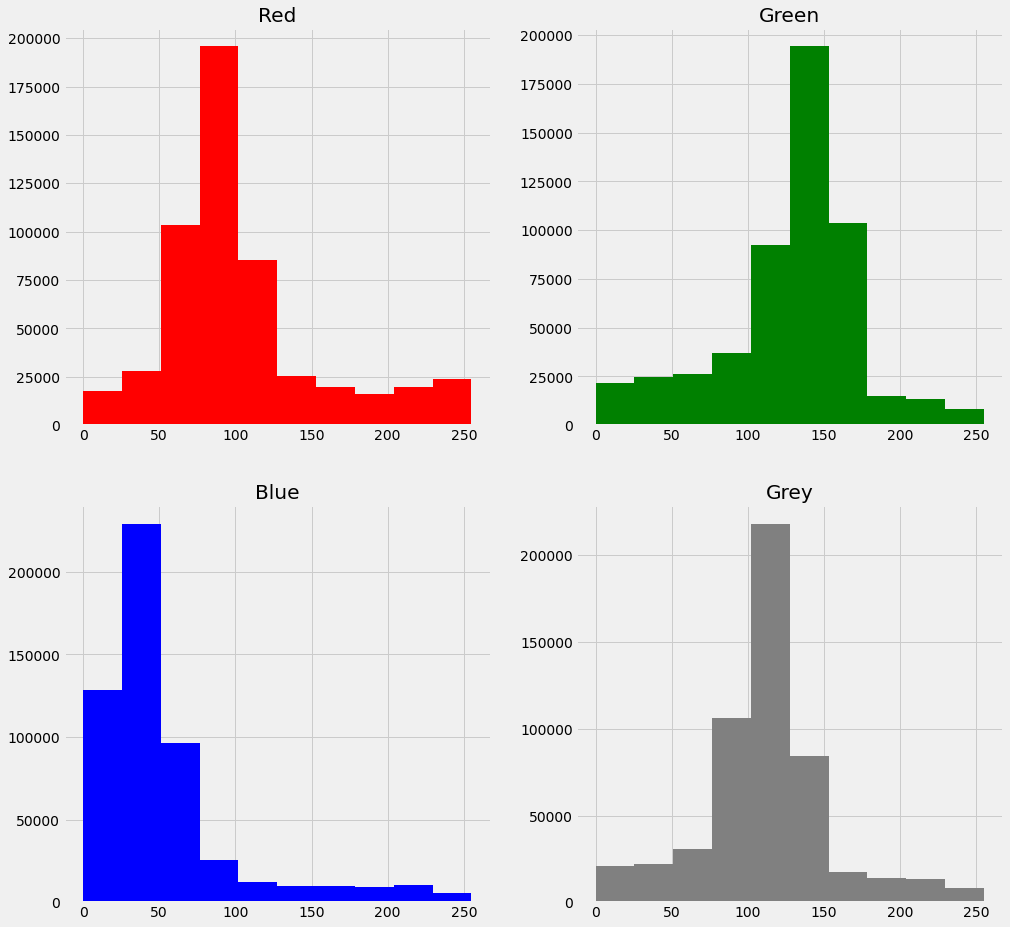

In [32]:
displayHistogram(dfCountColors)

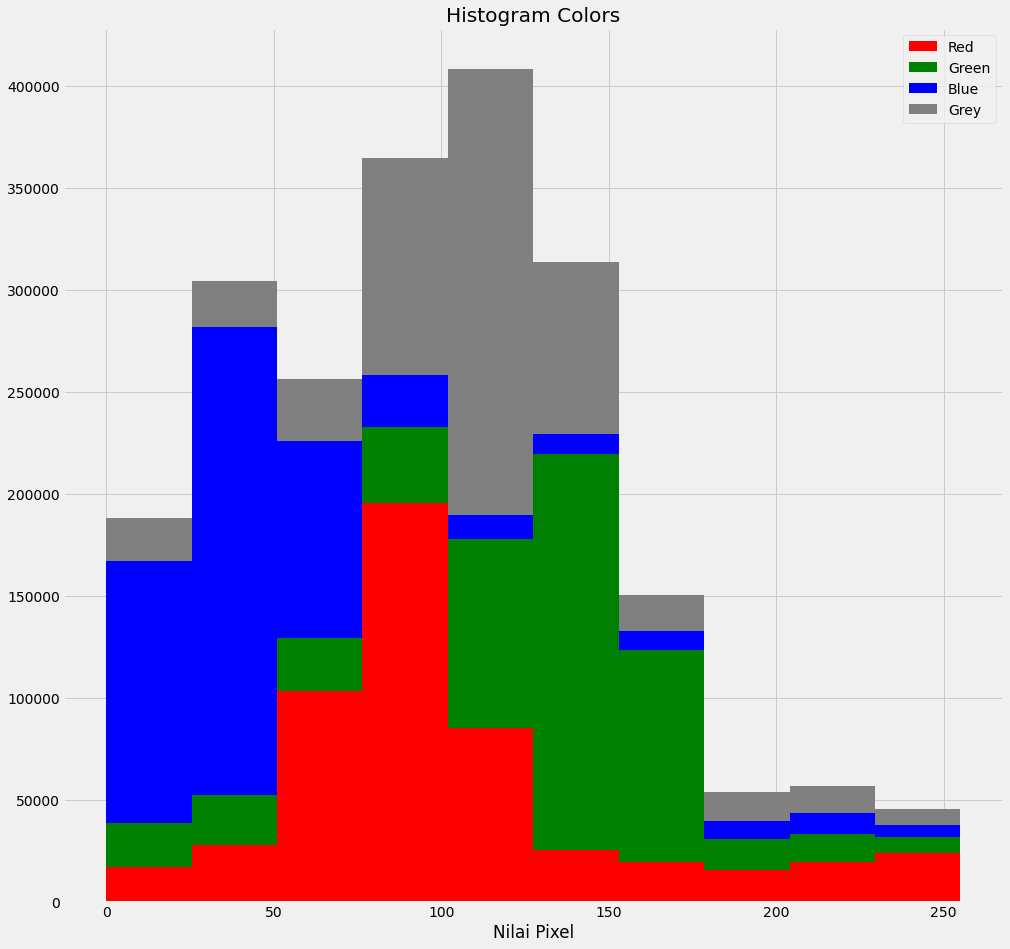

In [33]:
nameColors = dfColors.columns
dfColors.plot.hist(stacked=True, figsize=(15, 15), color=nameColors)
_ = plt.title("Histogram Colors")
_ = plt.xlabel("Nilai Pixel")
_ = plt.ylabel("")

### Normalization Histogram

In [34]:
df_img1.shape

(549, 976)

In [35]:
dfCountColors.shape

(256, 4)

In [36]:
def normalizeColor(dfParent, dfColors):

    prob_color = []

    rows, columns = dfParent.shape
    
    n = rows * columns
    for i in range(len(dfColors)):
        prob = dfColors[i] / n
        prob_color.append(prob)

    return prob_color

In [37]:
normRed = normalizeColor(df_img1, dfCountColors["Red"])
normGreen = normalizeColor(df_img1, dfCountColors["Green"])
normBlue = normalizeColor(df_img1, dfCountColors["Blue"])
normGrey = normalizeColor(df_img1, dfCountColors["Grey"])

dfNormColor = pd.DataFrame({
    "Red": normRed,
    "Green": normGreen,
    "Blue": normBlue,
    "Grey":normGrey
})

In [38]:
len(dfNormColor)

256

In [39]:
len(normRed)

256

In [40]:
dfNormColor['Red']

0      0.000112
1      0.000060
2      0.000054
3      0.000114
4      0.000125
         ...   
251    0.001151
252    0.001135
253    0.001073
254    0.000909
255    0.002812
Name: Red, Length: 256, dtype: float64

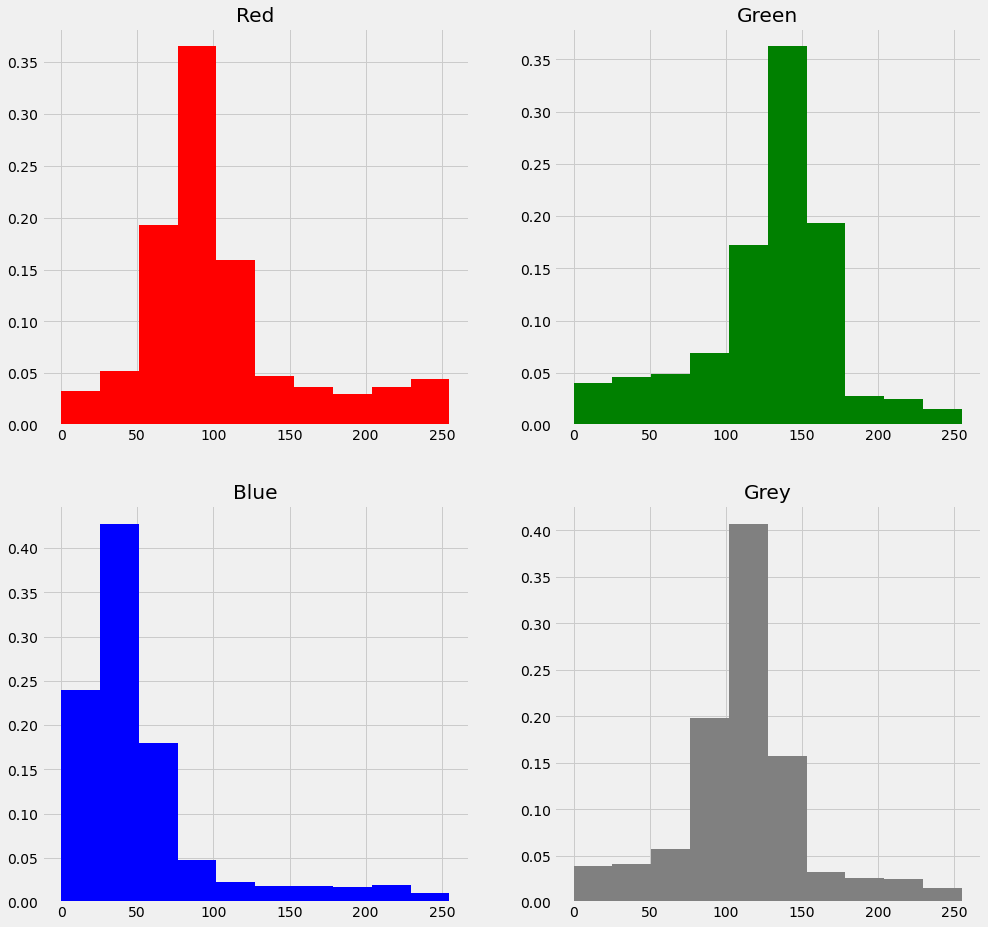

In [41]:
displayHistogram(dfNormColor)

## HSV, HSL, YUV, YCbCr

In [42]:
df_img1.shape

(549, 976)

### HSL

In [43]:
import numpy as np

def rgbToHSV(dfRGB):

  rows, columns = dfRGB.shape
  npRGB = np.array(copy.deepcopy(dfRGB))

  norm_npRGB = npRGB/255
  npHSV = []

  for row in range(rows):
    for column in range(columns):
      r, g, b = norm_npRGB[row][column]

      ##################### set, hue, max, min #####################
      hue_value = 0
      maximum = max(r, g, b)
      minimum = min(r, g, b)
      if maximum == minimum:
          hue_value = 0
      elif maximum == r :
          g_b = g - b
          max_min = maximum - minimum
          mod_6 = (g_b / max_min) % 6
          hue_value = 60 * mod_6
      elif maximum == g:
          b_r = b - r 
          max_min = maximum - minimum
          add_2 = (b_r / max_min) + 2
          hue_value = 60 * add_2
      elif maximum == b:
          r_g = r - g
          max_min = maximum - minimum
          add_4 = (r_g / max_min) + 4
          hue_value = 60 * add_4

      ##############################################################
      ############# insert hue, saturation, value to hsv ###########
      v_value = maximum

      saturation_value = 0
      if maximum == minimum:
          saturation_value = 0
      else:
          max_min = maximum - minimum
          saturation_value = max_min / v_value

      hue_value = int(hue_value)
      saturation_value = int(saturation_value * 100)
      v_value = int(v_value * 100)

      npHSV.append([hue_value, saturation_value, v_value])

    return np.array(npHSV)

In [44]:
img1_npHSV = rgbToHSV(df_img1)
df_img1_HSV = pd.DataFrame(img1_npHSV)
df_img1_HSV = df_img1_HSV.rename(columns={0: "Hue", 1:"Saturation", 2:"Value"})
df_img1_HSV

Hue  Saturation  Value
0     79          82     60
1     80          81     60
2     80          81     60
3     80          81     60
4     80          80     60
..   ...         ...    ...
971   95          62     58
972   95          62     58
973   95          62     58
974   96          61     58
975   96          61     58

[976 rows x 3 columns]

#### HSV Table

In [45]:
from tabulate import tabulate

print(tabulate(df_img1_HSV, headers=df_img1_HSV.columns, tablefmt='fancy_grid'))

╒═════╤═══════╤══════════════╤═════════╕
│     │   Hue │   Saturation │   Value │
╞═════╪═══════╪══════════════╪═════════╡
│   0 │    79 │           82 │      60 │
├─────┼───────┼──────────────┼─────────┤
│   1 │    80 │           81 │      60 │
├─────┼───────┼──────────────┼─────────┤
│   2 │    80 │           81 │      60 │
├─────┼───────┼──────────────┼─────────┤
│   3 │    80 │           81 │      60 │
├─────┼───────┼──────────────┼─────────┤
│   4 │    80 │           80 │      60 │
├─────┼───────┼──────────────┼─────────┤
│   5 │    80 │           80 │      60 │
├─────┼───────┼──────────────┼─────────┤
│   6 │    80 │           79 │      60 │
├─────┼───────┼──────────────┼─────────┤
│   7 │    80 │           77 │      60 │
├─────┼───────┼──────────────┼─────────┤
│   8 │    80 │           77 │      60 │
├─────┼───────┼──────────────┼─────────┤
│   9 │    80 │           77 │      59 │
├─────┼───────┼──────────────┼─────────┤
│  10 │    80 │           76 │      59 │
├─────┼───────┼─

### HSL

In [46]:
import numpy as np

def rgbToHSL(dfRGB):

  rows, columns = dfRGB.shape
  npRGB = np.array(copy.deepcopy(dfRGB))

  norm_npRGB = npRGB/255
  npHSL = []

  for row in range(rows):
    for column in range(columns):
      r, g, b = norm_npRGB[row][column]

      ##################### set, hue, max, min #####################
      hue_value = 0
      maximum = max(r, g, b)
      minimum = min(r, g, b)
      if maximum == minimum:
          hue_value = 0
      elif maximum == r :
          g_b = g - b
          max_min = maximum - minimum
          mod_6 = (g_b / max_min) % 6
          hue_value = 60 * mod_6
      elif maximum == g:
          b_r = b - r 
          max_min = maximum - minimum
          add_2 = (b_r / max_min) + 2
          hue_value = 60 * add_2
      elif maximum == b:
          r_g = r - g
          max_min = maximum - minimum
          add_4 = (r_g / max_min) + 4
          hue_value = 60 * add_4

      ##############################################################
      ############# insert hue, saturation, value to HSL ###########
      lightness_value = (1/2) * (maximum+minimum)

      saturation_value = 0
      if maximum == minimum:
          saturation_value = 0
      elif lightness_value <= 0.5:
          max_min = maximum - minimum
          divider = 2 * lightness_value
          saturation_value = max_min / divider
      elif lightness_value > 0.5:
          max_min = maximum - minimum
          divider = 2 - (2 * lightness_value)
          saturation_value = max_min / divider

      hue_value = int(hue_value)
      saturation_value = int(saturation_value * 100)
      lightness_value = int(lightness_value * 100)

      npHSL.append([hue_value, saturation_value, lightness_value])

    return np.array(npHSL)

In [47]:
img1_npHSL = rgbToHSL(df_img1)
df_img1_HSL = pd.DataFrame(img1_npHSL)
df_img1_HSL = df_img1_HSL.rename(columns={0: "Hue", 1:"Saturation", 2:"Lightness"})
df_img1_HSL

Hue  Saturation  Lightness
0     79          70         35
1     80          68         36
2     80          68         36
3     80          68         36
4     80          66         36
..   ...         ...        ...
971   95          45         39
972   95          45         39
973   95          45         39
974   96          44         40
975   96          44         40

[976 rows x 3 columns]

#### HSL Table

In [48]:
from tabulate import tabulate

print(tabulate(df_img1_HSL, headers=df_img1_HSL.columns, tablefmt='fancy_grid'))

╒═════╤═══════╤══════════════╤═════════════╕
│     │   Hue │   Saturation │   Lightness │
╞═════╪═══════╪══════════════╪═════════════╡
│   0 │    79 │           70 │          35 │
├─────┼───────┼──────────────┼─────────────┤
│   1 │    80 │           68 │          36 │
├─────┼───────┼──────────────┼─────────────┤
│   2 │    80 │           68 │          36 │
├─────┼───────┼──────────────┼─────────────┤
│   3 │    80 │           68 │          36 │
├─────┼───────┼──────────────┼─────────────┤
│   4 │    80 │           66 │          36 │
├─────┼───────┼──────────────┼─────────────┤
│   5 │    80 │           66 │          36 │
├─────┼───────┼──────────────┼─────────────┤
│   6 │    80 │           65 │          36 │
├─────┼───────┼──────────────┼─────────────┤
│   7 │    80 │           63 │          36 │
├─────┼───────┼──────────────┼─────────────┤
│   8 │    80 │           62 │          36 │
├─────┼───────┼──────────────┼─────────────┤
│   9 │    80 │           63 │          36 │
├─────┼───

### YUV

In [49]:
import numpy as np

def rgbToYUV(dfRGB):

  rows, columns = dfRGB.shape
  npRGB = np.array(copy.deepcopy(dfRGB))

  npYUV = []

  for row in range(rows):
    npYUV.append([])
    for column in range(columns):
      ################ get rgb value ################ 
      r, g, b = npRGB[row][column]/255

      ################ set y ################  
      y = 0.299 * r + 0.587 * g + 0.114 * b

      ################ set u, v  ################ 

      u = 0.436 * ((b-y)/0.886)
      v = 0.615 * ((r-y)/0.701)

      npYUV[row].append([y, u, v])

  return np.array(npYUV) * 255

In [50]:
df_img1[0][0]

array([113, 155,  27], dtype=int32)

In [51]:
img1_npYUV = rgbToYUV(df_img1)

In [52]:
type(img1_npYUV)

numpy.ndarray

In [53]:
img1_npYUV[0][0]

array([127.85      , -49.6282167 , -13.02817404])

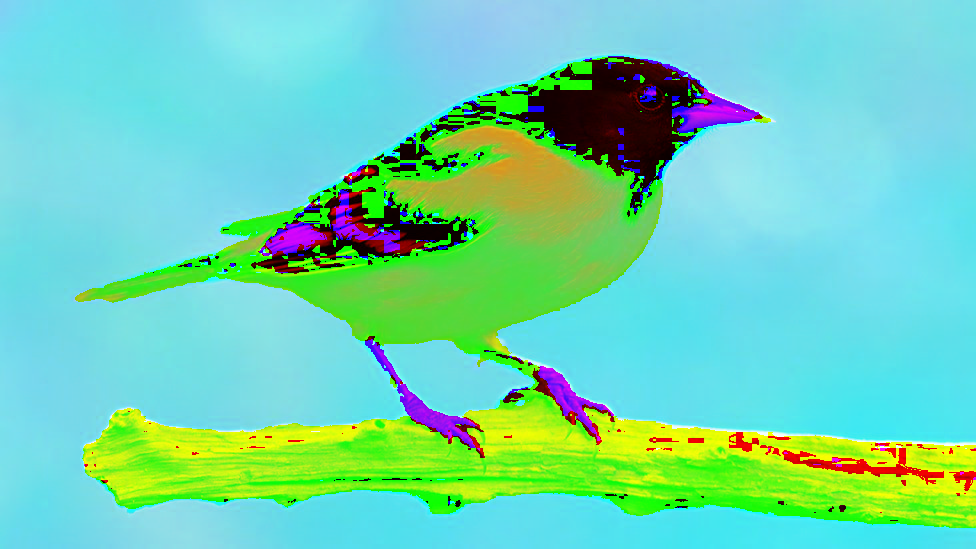

In [54]:
displayImage(img1_npYUV)

### YCbCr

In [55]:
import numpy as np

def rgbToYCBCR(dfRGB):

  rows, columns = dfRGB.shape
  npRGB = np.array(copy.deepcopy(dfRGB))

  npYCBCR = []

  for row in range(rows):
    npYCBCR.append([])
    for column in range(columns):
      ################ get rgb value ################ 
      r, g, b = npRGB[row][column]/255

      ################ set y ################  
      y = (0.299 * r) + (0.587 * g) + (0.114 * b)

      ################ set cb, cr  ################ 

      cb =  (-0.1687 * r) - (0.3313 * g) + (0.5 * b) + 128
      cr = (0.5 * r) - (0.4187 * g) - (0.0813 * b) + 128

      npYCBCR[row].append([y, cb, cr])

  return np.array(npYCBCR) * 255

In [56]:
img1_npYCBCR = rgbToYCBCR(df_img1)

In [57]:
img1_npYCBCR[0][0]

array([  127.85  , 32583.0854, 32629.4064])

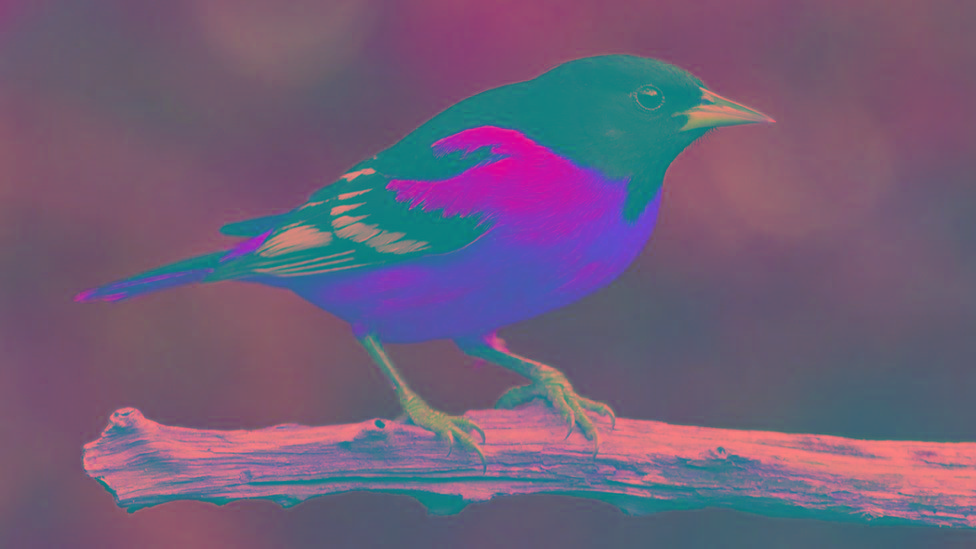

In [58]:
displayImage(img1_npYCBCR)

## Edge Detection


### Prewitt

In [59]:
npImg1Grey.shape

(549, 976)

In [60]:
import copy
import math

def edgePrewitt(nmImgGrey):

  rows, columns = nmImgGrey.shape
  img_edge_detection = (copy.deepcopy(nmImgGrey)) * 0

  gx = (copy.deepcopy(nmImgGrey)) * 0
  gy = (copy.deepcopy(nmImgGrey)) * 0
  
  gx_matrix = [
      [1, 0, -1],
      [1, 0, -1],
      [1, 0, -1]
  ]

  gy_matrix = [
      [1, 1, 1],
      [-0, 0, 0],
      [-1, -1, -1]
  ]

  gx_matrix = np.asarray(gx_matrix)
  gy_matrix = np.asarray(gy_matrix)


  for row in range(1, rows-1):
      for column in range(1, columns-1):
          temp_matrix = [
              [nmImgGrey[row-1, column-1], nmImgGrey[row-1, column], nmImgGrey[row-1, column+1]],
              [nmImgGrey[row, column-1], nmImgGrey[row, column], nmImgGrey[row, column+1]],
              [nmImgGrey[row+1, column-1], nmImgGrey[row+1, column], nmImgGrey[row+1, column+1]]
          ]
          
          temp_matrix = np.asarray(temp_matrix)

          n_gx = 0
          n_gy = 0
          for x in range(len(temp_matrix)):
              for y in range(len(temp_matrix[0])):
                  n_gx += temp_matrix[x, y] * gx_matrix[x, y] 

                  n_gy += temp_matrix[x, y] * gy_matrix[x, y] 
              

          g = math.sqrt(pow(n_gx, 2) + pow(n_gy, 2))
          
          gx[row][column] = n_gx
          gy[row][column] = n_gy
          img_edge_detection[row][column] = g

  return gx, gy, img_edge_detection

In [61]:
gx, gy, edge = edgePrewitt(npImg1Grey)

edgePrewitt_Img1Grey = {
    "gx": gx,
    "gy": gy,
    "edge": edge
}

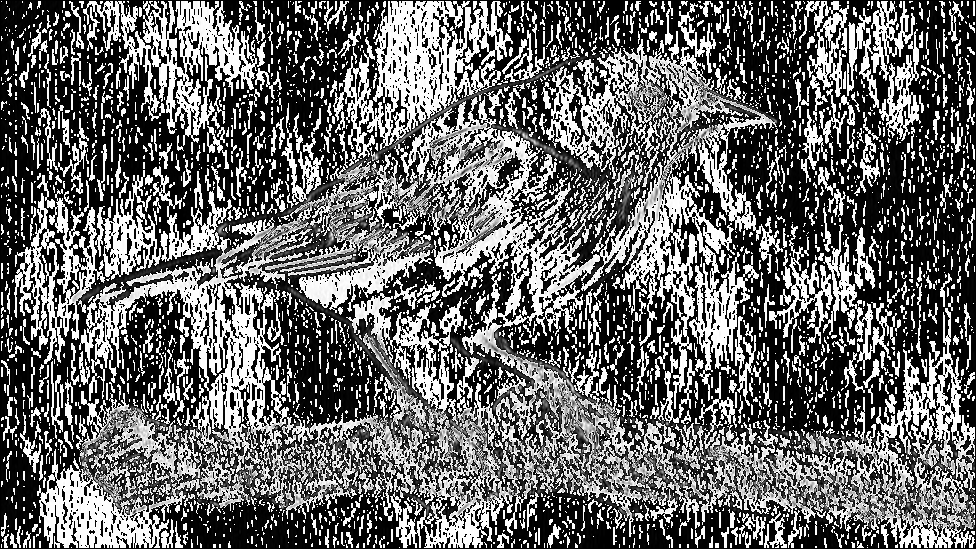

In [62]:
displayImage(edgePrewitt_Img1Grey["gx"])

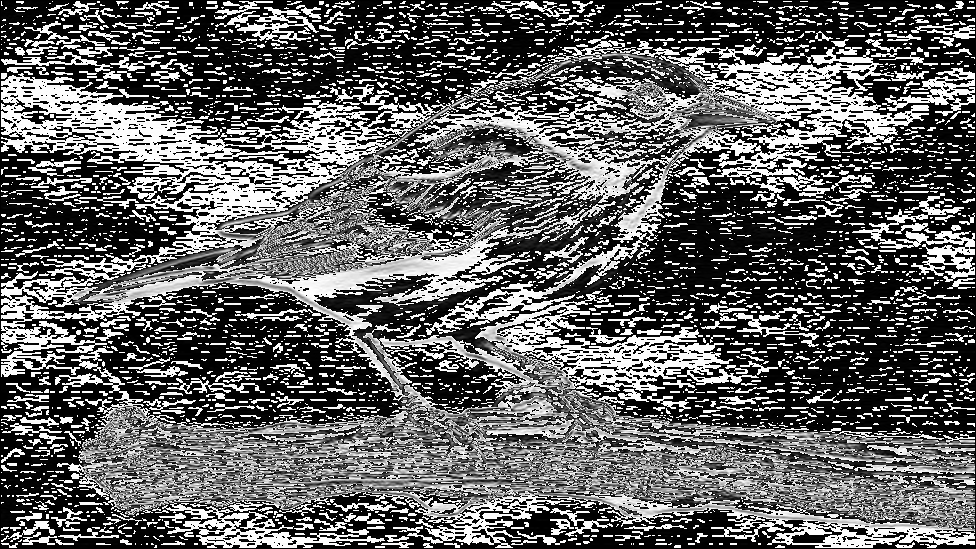

In [63]:
displayImage(edgePrewitt_Img1Grey["gy"])

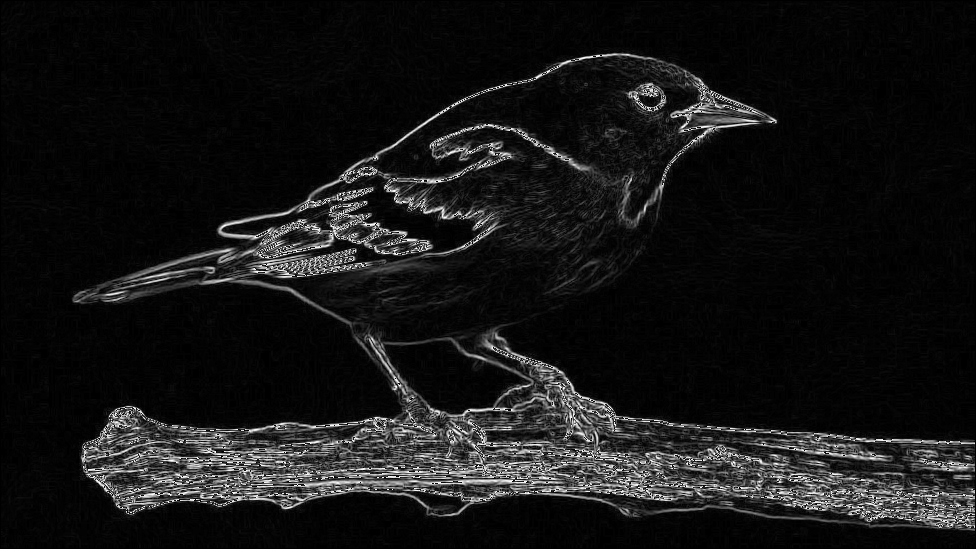

In [64]:
displayImage(edgePrewitt_Img1Grey["edge"])

### Sobel

In [65]:
import copy
import math

def edgeSobel(nmImgGrey):

  rows, columns = nmImgGrey.shape
  img_edge_detection = (copy.deepcopy(nmImgGrey)) * 0

  gx = (copy.deepcopy(nmImgGrey)) * 0
  gy = (copy.deepcopy(nmImgGrey)) * 0
  
  gx_matrix = [
      [1, 0, -1],
      [2, 0, -2],
      [1, 0, -1]
  ]

  gy_matrix = [
      [1, 2, 1],
      [-0, 0, 0],
      [-1, -2, -1]
  ]

  gx_matrix = np.asarray(gx_matrix)
  gy_matrix = np.asarray(gy_matrix)


  for row in range(1, rows-1):
      for column in range(1, columns-1):
          temp_matrix = [
              [nmImgGrey[row-1, column-1], nmImgGrey[row-1, column], nmImgGrey[row-1, column+1]],
              [nmImgGrey[row, column-1], nmImgGrey[row, column], nmImgGrey[row, column+1]],
              [nmImgGrey[row+1, column-1], nmImgGrey[row+1, column], nmImgGrey[row+1, column+1]]
          ]
          
          temp_matrix = np.asarray(temp_matrix)

          n_gx = 0
          n_gy = 0
          for x in range(len(temp_matrix)):
              for y in range(len(temp_matrix[0])):
                  n_gx += temp_matrix[x, y] * gx_matrix[x, y] 

                  n_gy += temp_matrix[x, y] * gy_matrix[x, y] 
              

          g = math.sqrt(pow(n_gx, 2) + pow(n_gy, 2))
          
          gx[row][column] = n_gx
          gy[row][column] = n_gy
          img_edge_detection[row][column] = g

  return gx, gy, img_edge_detection

In [66]:
gx, gy, edge = edgeSobel(npImg1Grey)

edgeSobel_Img1Grey = {
    "gx": gx,
    "gy": gy,
    "edge": edge
}

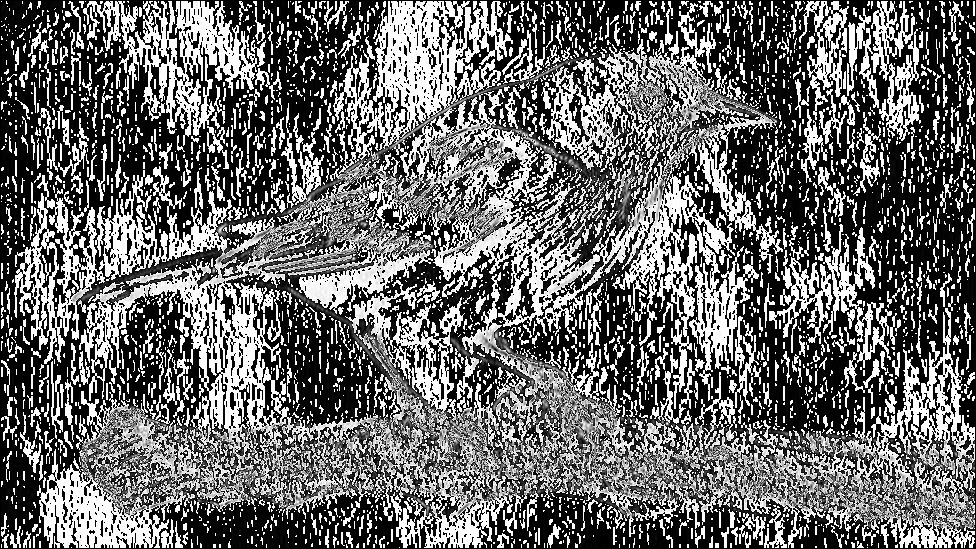

In [67]:
displayImage(edgeSobel_Img1Grey["gx"])

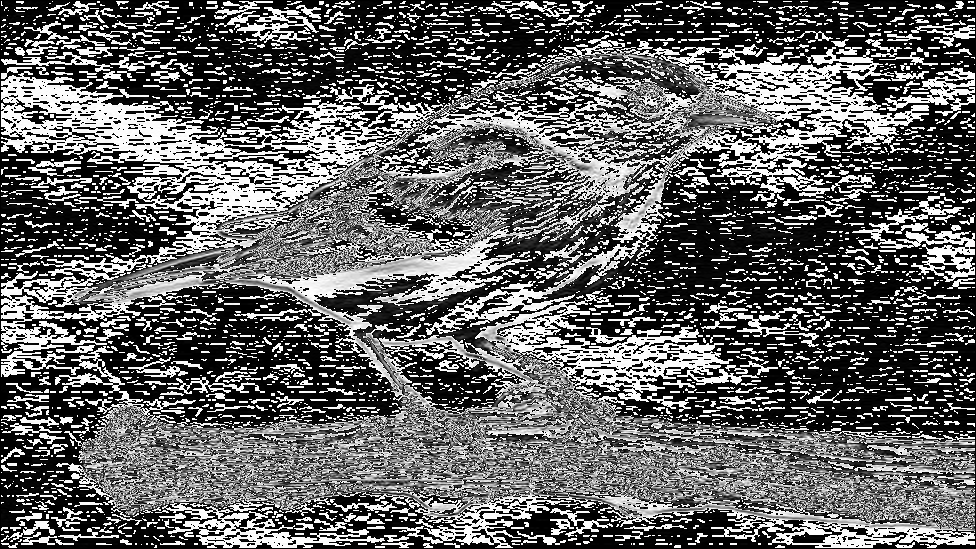

In [68]:
displayImage(edgeSobel_Img1Grey["gy"])

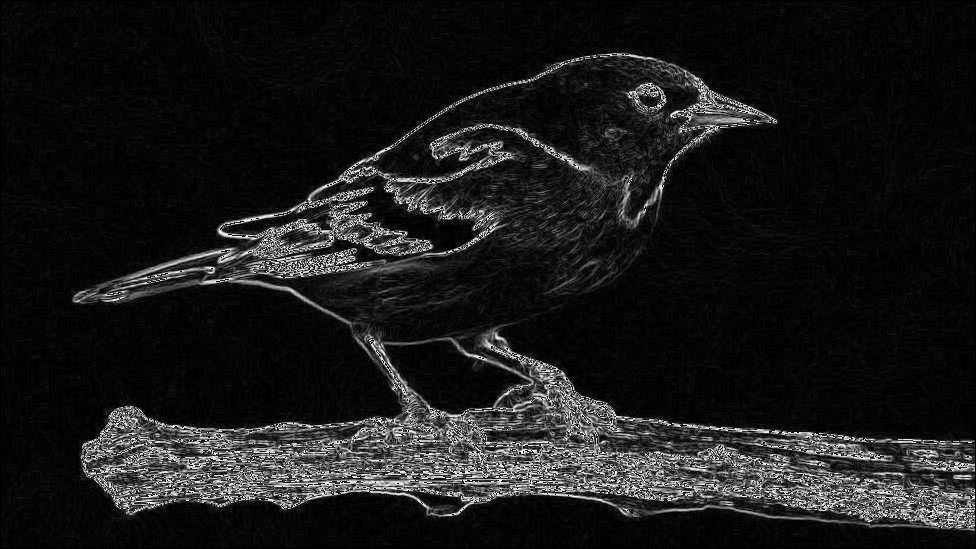

In [69]:
displayImage(edgeSobel_Img1Grey["edge"])

#### Prewit vs Sobel

In [70]:
plt.style.use('default')

(-0.5, 975.5, 548.5, -0.5)

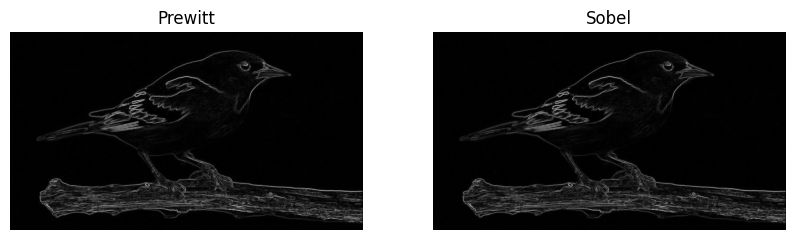

In [71]:
rows, columns = 1, 2

fig, axes = plt.subplots(nrows=rows, ncols=columns, figsize=(10,10 ))

axes[0].set_title("Prewitt")
axes[0].imshow(edgePrewitt_Img1Grey["edge"], cmap='gray')
axes[0].axis('off')


axes[1].set_title("Sobel")
axes[1].imshow(edgeSobel_Img1Grey["edge"], cmap='gray')
axes[1].axis('off')

## Pixel Arithmetic Operation

Sample image: <br>
gambar 1:<br>
https://media.geeksforgeeks.org/wp-content/uploads/20190222191001/1bit1.png <br>
gambar 2:<br>
https://media.geeksforgeeks.org/wp-content/uploads/20190222191045/2bit2.png

In [72]:
from PIL import Image
import numpy as np

import pandas as pd

pathImg = getImageFromUrl("https://media.geeksforgeeks.org/wp-content/uploads/20190222191001/1bit1.png", "sample")
get_img_A = Image.open(pathImg)
imgA_Array2D = matrix2DImage(pathImg, (500, 500))
df_imgA = pd.DataFrame(imgA_Array2D)
npImgAGrey = matrixRGBToGrey(df_imgA)

pathImg = getImageFromUrl("https://media.geeksforgeeks.org/wp-content/uploads/20190222191045/2bit2.png", "sample")
get_img_B = Image.open(pathImg)
imgB_Array2D = matrix2DImage(pathImg, (500, 500))
df_imgB = pd.DataFrame(imgB_Array2D)
npImgBGrey = matrixRGBToGrey(df_imgB)

(500, 500)


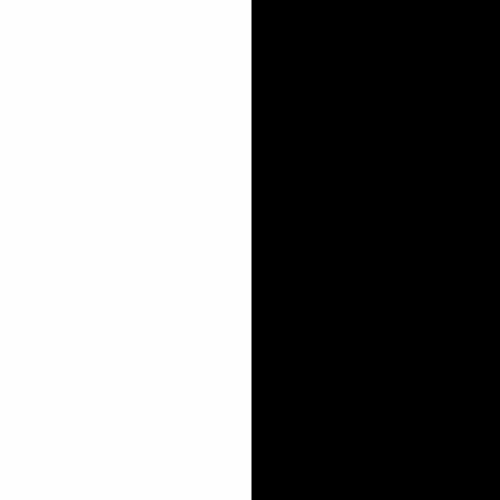

In [73]:
print(npImgAGrey.shape)
displayImage(npImgAGrey)

(500, 500)


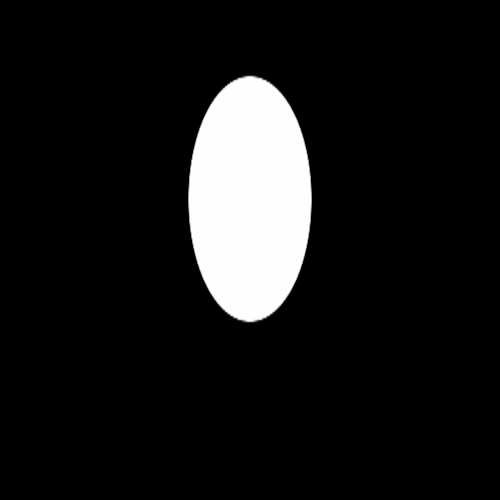

In [74]:
print(npImgBGrey.shape)
displayImage(npImgBGrey)

### Addition

#### Addition with 255

In [75]:
new_img_grey_bright = copy.deepcopy(npImgAGrey)
rows, columns = new_img_grey_bright.shape

for row in range(rows):
    for column in range(columns):
        temp = new_img_grey_bright[row][column] + 100
        if temp > 255:
          new_img_grey_bright[row][column] = 255
        else:
          new_img_grey_bright[row][column] = temp

##### Before

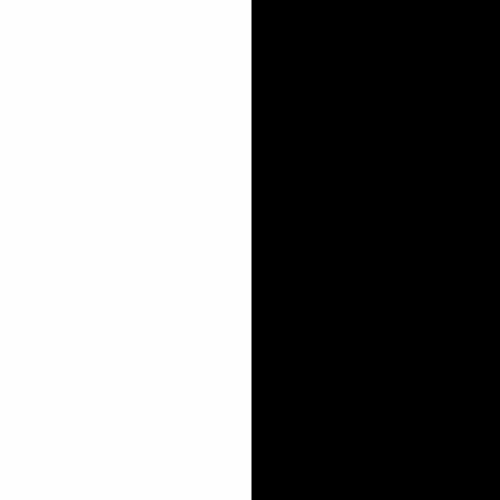

In [76]:
displayImage(npImgAGrey)

##### After

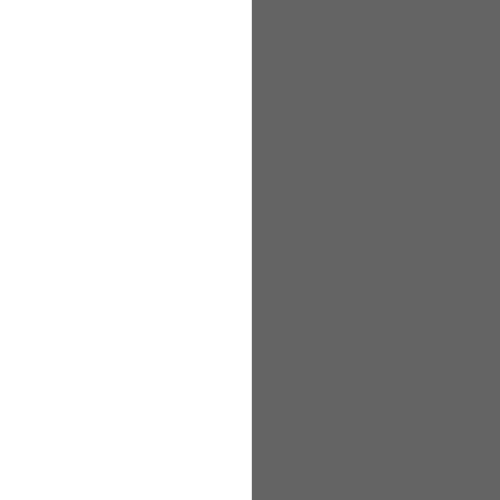

In [77]:
displayImage(new_img_grey_bright)

#### Addition imageA + imageB

In [78]:
rows, columns = npImgAGrey.shape

new_img = copy.deepcopy(npImgAGrey)

for row in range(rows):
    for column in range(columns):
        temp = npImgAGrey[row][column] + npImgBGrey[row][column]
        if temp > 255:
          new_img[row][column] = 255
        else:
          new_img[row][column] = temp

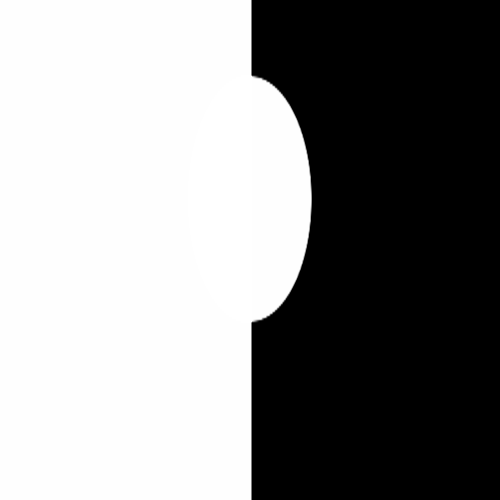

In [79]:
displayImage(new_img)

### Subtraction

#### Subtraction with 255

In [80]:
new_img_grey_dark = copy.deepcopy(npImgAGrey)
rows, columns = new_img_grey_dark.shape

for row in range(rows):
    for column in range(columns):
        temp = new_img_grey_dark[row][column] - 100
        if temp < 0:
          new_img_grey_dark[row][column] = 0
        else:
          new_img_grey_dark[row][column] = temp

##### Before

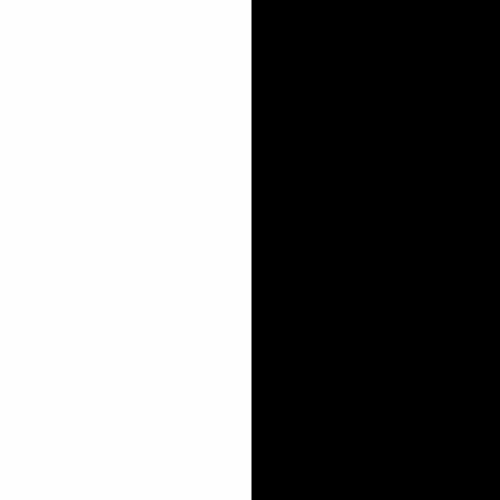

In [81]:
displayImage(npImgAGrey)

##### After

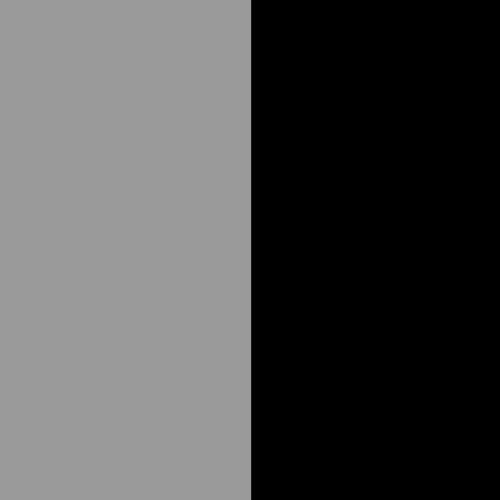

In [82]:
displayImage(new_img_grey_dark)

#### Subtraction imageA + imageB

In [83]:
rows, columns = npImgAGrey.shape

new_img = copy.deepcopy(npImgAGrey)

for row in range(rows):
    for column in range(columns):
        temp = npImgAGrey[row][column] - npImgBGrey[row][column]
        if temp < 0:
          new_img[row][column] = 255
        else:
          new_img[row][column] = temp

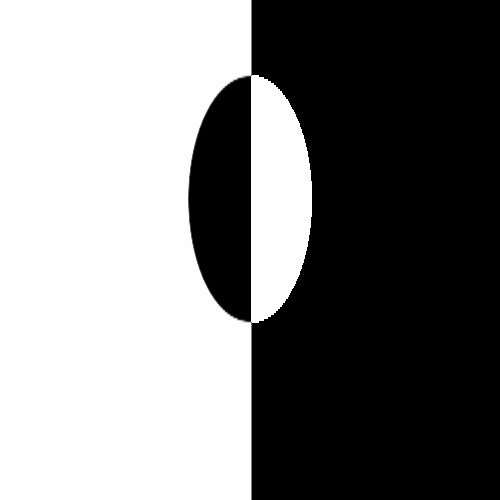

In [84]:
displayImage(new_img)

### Logic Operation

#### And Operation

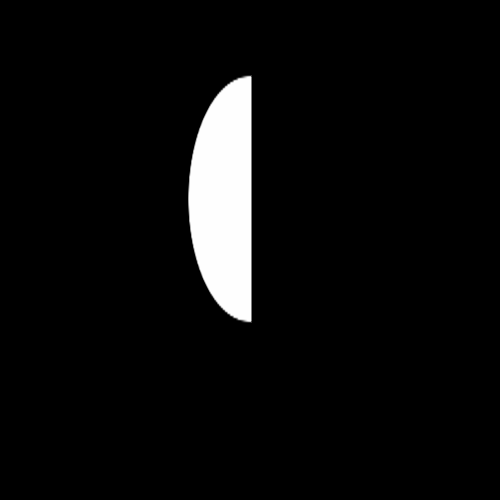

In [85]:
import cv2

new_img = cv2.bitwise_and(npImgAGrey, npImgBGrey)

displayImage(new_img)

#### OR Operation

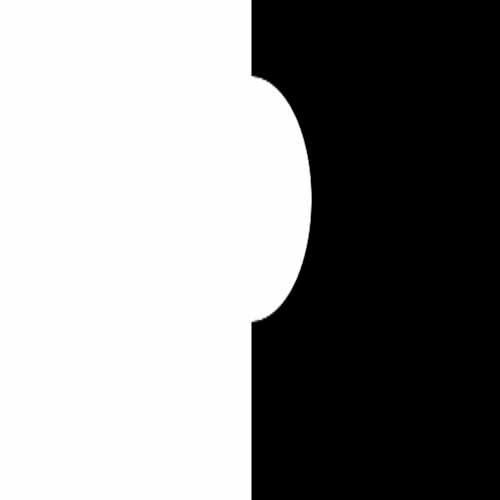

In [86]:
import cv2

new_img = cv2.bitwise_or(npImgAGrey, npImgBGrey)

displayImage(new_img)

## Fourier Transform

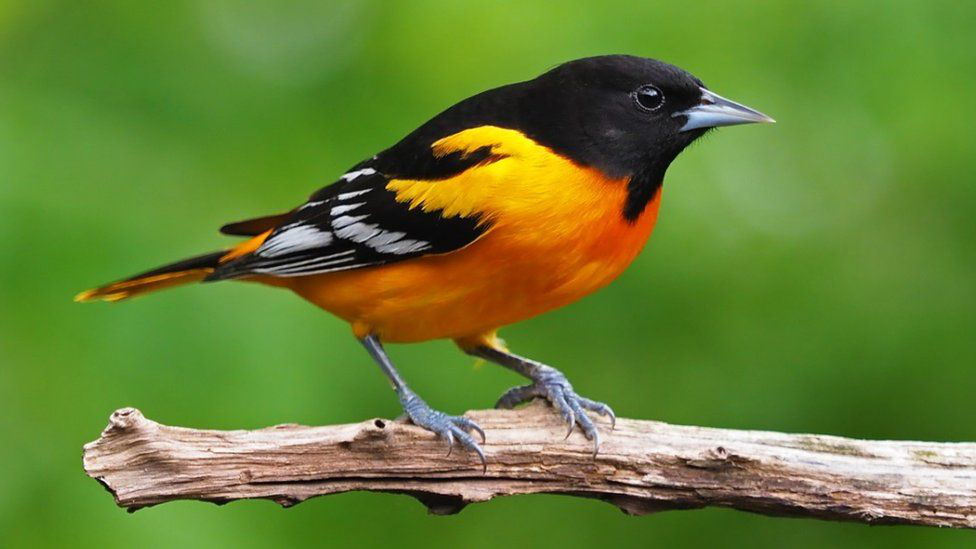

In [87]:
get_img

In [88]:
import warnings
import numpy as np
warnings.simplefilter("ignore", np.ComplexWarning)

In [89]:
npImg1Grey.shape

(549, 976)

### Image Transformation from Spatial Domain to Frequency Domain

In [90]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('default')

def spatialToFrequency(npGrey):

  f = np.fft.fft2(npGrey)
  f2 = np.fft.fftshift(f)
  f2 = abs(f2)
  f2 = np.log(f2+1)


  fig, axs = plt.subplots(1, 3, figsize=(20, 20))

  axs[0].set_title("Image", fontweight='bold')
  axs[0].imshow(npGrey, cmap='gray')

  axs[1].set_title("Magnitude Spectrum Without Shift", fontweight='bold')
  axs[1].imshow(np.log(abs(f)+1), cmap='gray')

  axs[2].set_title("Magnitude Spectrum With Shift", fontweight='bold')
  axs[2].imshow(100*f2, cmap='gray')
  
  plt.show()

  return f, f2

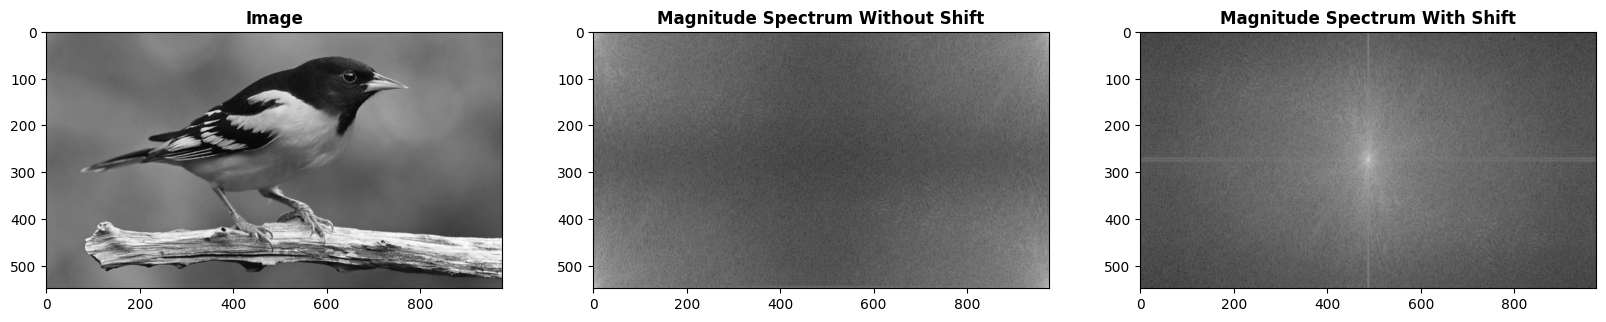

In [91]:
f, f2 = spatialToFrequency(npImg1Grey)

### Image Transformation from Frequency Domain to Spatial Domain

In [92]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('default')

def frequencyToSpatial(f, f2):

  j = np.fft.ifft2(f)
  j = j.astype(np.uint8)

  fig, axs = plt.subplots(1, 2, figsize=(20, 20))

  axs[0].set_title("Magnitude Spectrum", fontweight='bold')
  axs[0].imshow(100*f2, cmap='gray')

  axs[1].set_title("Image", fontweight='bold')
  axs[1].imshow(j, cmap='gray')

  plt.show()

  return j

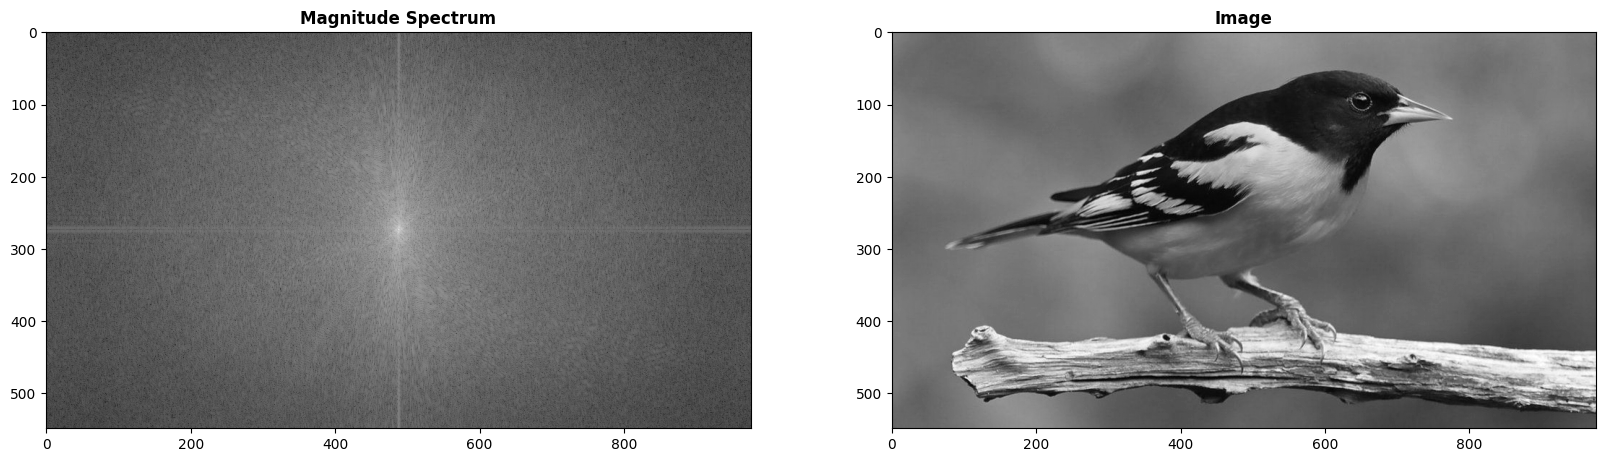

In [93]:
j = frequencyToSpatial(f, f2)

## Opacity Image

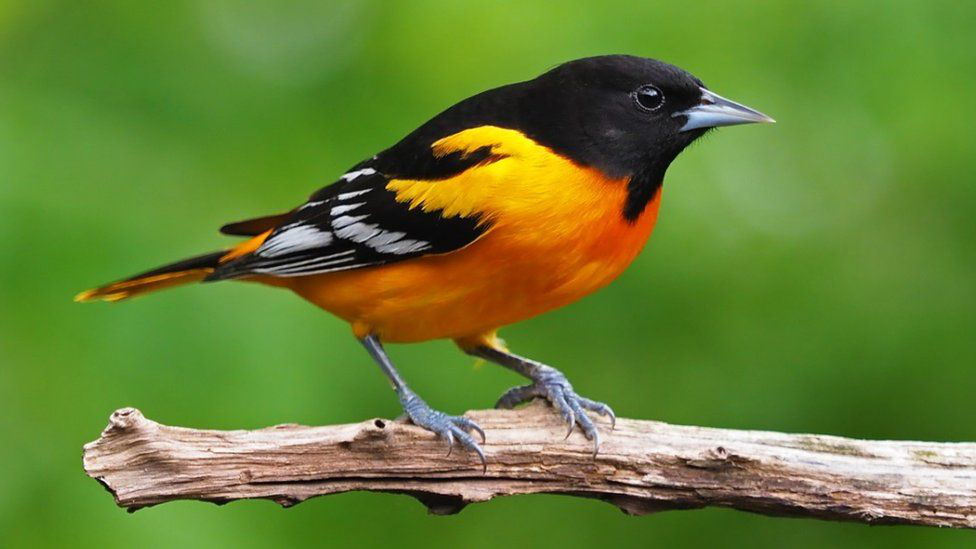

In [94]:
get_img

In [95]:
def changeOpacityImg(img, opacityValue, nameImg):
  
  rgbaImg = img.convert("RGBA")
  rgbaImgNumpy = np.asarray(rgbaImg, dtype='int32')

  rows, columns, _ = rgbaImgNumpy.shape

  for row in range(rows):
    for column in range(columns):
      rgbaImgNumpy[row][column] = [rgbaImgNumpy[row][column][0], rgbaImgNumpy[row][column][1], \
                                   rgbaImgNumpy[row][column][2], int(rgbaImgNumpy[row][column][3] * opacityValue)]

  img =  Image.fromarray((rgbaImgNumpy).astype(np.uint8))

  nameImg = f"{nameImg}_alpha_{int(opacityValue*100)}%.png"
  img.save(nameImg, "PNG")

  return rgbaImgNumpy, nameImg, img

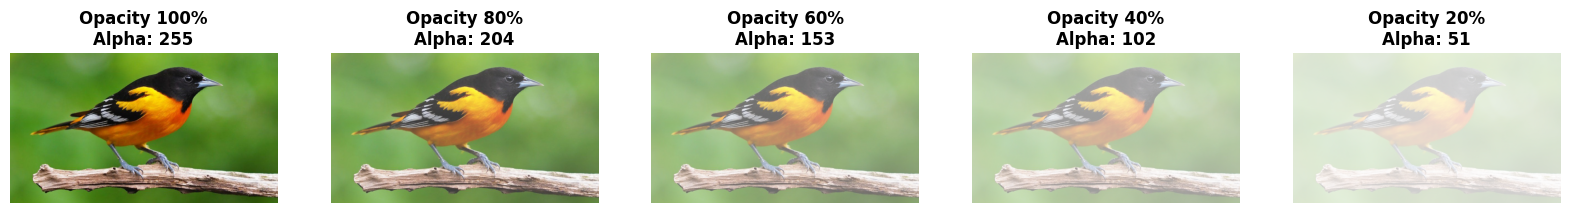

In [96]:
import matplotlib.pyplot as plt

rows, columns = 1, 5
fig, axs = plt.subplots(rows, columns, figsize=(20, 20))

opacityValue = 1

imgData = {
    "numpyImg" : [],
    "imgPhoto" : [],
    "imgName"  : []
}

for column in range(columns):

  nameImg = "img" + str(column+1)
  numpyImg, nameImg, img = changeOpacityImg(get_img, opacityValue, nameImg)
  axs[column].set_title(f"Opacity {int(opacityValue*100)}%\nAlpha: {numpyImg[0][0][3]}", fontweight='bold')
  axs[column].imshow(img, cmap='gray')
  axs[column].axis('off')

  imgData["numpyImg"].append(numpyImg)
  imgData["imgName"].append(nameImg)
  imgData["imgPhoto"].append(img)

  opacityValue = opacityValue - 0.2

plt.show()

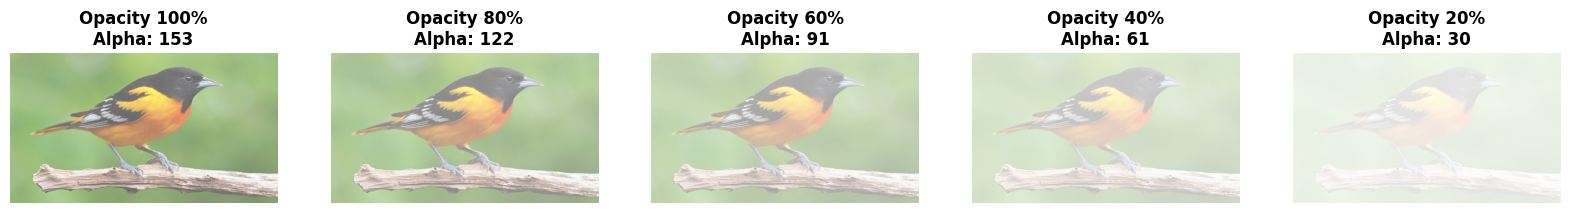

In [97]:
import matplotlib.pyplot as plt

# new sample image = imgData["imgName"][2]
new_img = Image.open(imgData["imgName"][2])

rows, columns = 1, 5
fig, axs = plt.subplots(rows, columns, figsize=(20, 20))

opacityValue = 1

imgData = {
    "numpyImg" : [],
    "imgPhoto" : [],
    "imgName"  : []
}

for column in range(columns):

  nameImg = "img" + str(column+1)
  numpyImg, nameImg, img = changeOpacityImg(new_img, opacityValue, nameImg)
  axs[column].set_title(f"Opacity {int(opacityValue*100)}%\nAlpha: {numpyImg[0][0][3]}", fontweight='bold')
  axs[column].imshow(img, cmap='gray')
  axs[column].axis('off')

  imgData["numpyImg"].append(numpyImg)
  imgData["imgName"].append(nameImg)
  imgData["imgPhoto"].append(img)

  opacityValue = opacityValue - 0.2

plt.show()